In [5]:
import numpy as np
import pylab as plt
import pickle
import os,sys
# import pandas as pd
from collections import Counter
import glob
import pandas as pd
%matplotlib inline  
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
pd.set_option('display.max_rows', 10)

# Read the dataframe

In [15]:
path_data = os.path.abspath(os.path.join(os.pardir,'results'))
print(path_data)

/DRIVE/REPOS/wos-text-dynamics/results


In [16]:
fname_data = 'results_combined_v100-n220-t46.tsv'

In [17]:
df = pd.read_table(os.path.join(path_data,fname_data),index_col=0)

In [18]:
df

,ent,jsd,year,cat,citations,pubs,insularity_out,insularity_in,cHin,cHout
0,11.218350,NaN,1991,Environmental Sciences,0.003872,0.011310,0.203408,0.269749,3.383197,3.639216
1,11.206128,0.341673,1992,Environmental Sciences,0.003886,0.011906,0.203292,0.270229,3.397948,3.648734
2,11.209673,0.340000,1993,Environmental Sciences,0.003975,0.012103,0.186027,0.257501,3.432132,3.734057
3,11.208089,0.341503,1994,Environmental Sciences,0.004364,0.012897,0.195790,0.269853,3.413343,3.705705
4,11.197011,0.342457,1995,Environmental Sciences,0.004761,0.013364,0.193285,0.259873,3.439472,3.676835
...,...,...,...,...,...,...,...,...,...,...
20,10.811720,0.281133,2011,Neuroimaging,0.000840,0.001337,0.062244,0.065735,2.995366,2.902713
21,10.813734,0.282015,2012,Neuroimaging,0.000897,0.001411,0.062979,0.072307,3.039712,2.861704
22,10.808784,0.281990,2013,Neuroimaging,0.000934,0.001358,0.063636,0.071007,3.035846,2.895661
23,10.803446,0.279587,2014,Neuroimaging,0.000958,0.001483,0.066557,0.080132,3.036975,2.877446


# Some analysis

In [23]:
## all fields 
fields = list(set(df.cat.values))

In [25]:
len(fields)
fields

['Engineering, Mechanical',
 'Emergency Medicine',
 'Literary Theory & Criticism',
 'Optics',
 'Economics',
 'Biochemical Research Methods',
 'Biodiversity Conservation',
 'Business, Finance',
 'Toxicology',
 'Mathematics, Applied',
 'Geosciences, Multidisciplinary',
 'Social Issues',
 'Oncology',
 'Literature, German, Dutch, Scandinavian',
 'Mathematical & Computational Biology',
 'Chemistry, Applied',
 'Peripheral Vascular Disease',
 'Materials Science, Biomaterials',
 'Agricultural Engineering',
 'Plant Sciences',
 'Marine & Freshwater Biology',
 'Engineering, Biomedical',
 'Meteorology & Atmospheric Sciences',
 'Physics, Mathematical',
 'Mining & Mineral Processing',
 'Medical Laboratory Technology',
 'Behavioral Sciences',
 'Automation & Control Systems',
 'Nuclear Science & Technology',
 'Computer Science, Hardware & Architecture',
 'Respiratory System',
 'Business',
 'Operations Research & Management Science',
 'Cell Biology',
 'Entomology',
 'Music',
 'Neurosciences',
 'Anthrop

In [48]:
# list_fields_sel = ['Physics, Nuclear','Biophysics', 'Physics, Mathematical' ]
list_fields_sel = ['Physics, Nuclear', 'Physics, Particles & Fields','Physics, Condensed Matter','Physics, Atomic, Molecular & Chemical' ]

# 'Biophysics',
# 'Physics, Particles & Fields'
# 'Physics, Mathematical'
# 'Physics, Atomic, Molecular & Chemical'
# 'Physics, Condensed Matter'

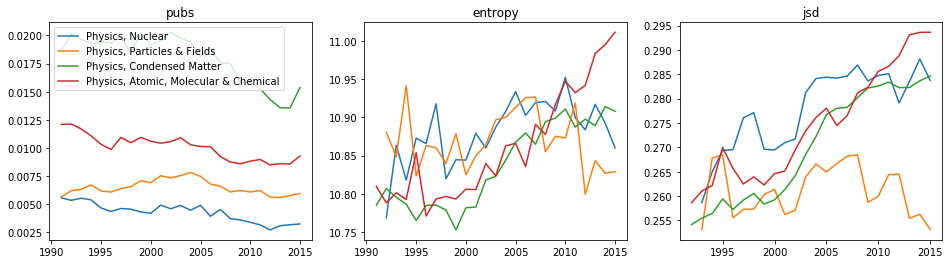

In [49]:
plt.figure(figsize=(16,4))

for field in list_fields_sel: 
    df_sel = df[df['cat']==field][['ent','jsd','year','pubs']]
    years = df_sel.year.values
    ent = df_sel.ent.values
    jsd = df_sel.jsd.values
    pub = df_sel.pubs.values
    
    plt.subplot(131)
    plt.title('pubs')
    plt.plot(years,pub,label=field)
    plt.subplot(132)
    plt.title('entropy')
    plt.plot(years,ent)
    plt.subplot(133)
    plt.title('jsd')
    plt.plot(years,jsd)
plt.subplot(131)
plt.legend(loc='upper left')